<a href="https://colab.research.google.com/github/Ekshith95421/LGM-DATASCIENCE/blob/main/Copy_of_Stock_market_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK-2 : STOCK MARKET PREDICTION AND FORECASTING USING STACKED LSTM**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [4]:
src="https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"

In [5]:
stock=pd.read_csv(src)  

In [6]:
stock

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [7]:
stock.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [8]:
stock.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [9]:
stock.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [10]:
stock.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

<Figure size 1440x576 with 0 Axes>

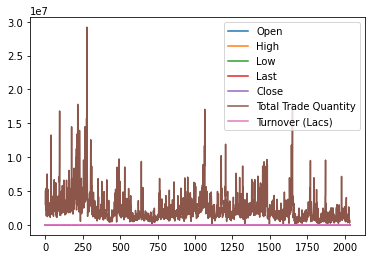

In [11]:
plt.figure(figsize=(20,8))
stock.plot()

In [12]:
stock['Date'].value_counts()

2018-09-28    1
2013-04-10    1
2013-03-20    1
2013-03-21    1
2013-03-22    1
             ..
2016-01-11    1
2016-01-12    1
2016-01-13    1
2016-01-14    1
2010-07-21    1
Name: Date, Length: 2035, dtype: int64

In [15]:
stock["Date"]=pd.to_datetime(stock["Date"])
stock["Date"]
     

0      2018-09-28
1      2018-09-27
2      2018-09-26
3      2018-09-25
4      2018-09-24
          ...    
2030   2010-07-27
2031   2010-07-26
2032   2010-07-23
2033   2010-07-22
2034   2010-07-21
Name: Date, Length: 2035, dtype: datetime64[ns]

In [16]:

stock=stock.sort_values(by="Date")
stock

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


In [17]:
stock.reset_index(inplace=True)
stock

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...,...
2030,4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
2031,3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2032,2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2033,1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


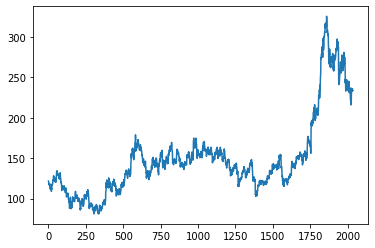

In [18]:
plt.plot(stock["Close"])

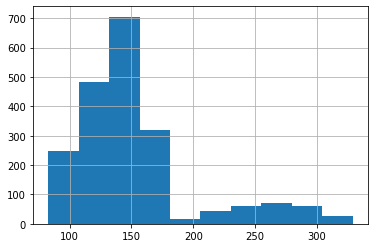

In [19]:
stock['High'].hist()

In [20]:
d1=stock["Close"]

In [21]:
scaler=MinMaxScaler(feature_range=(0,1))
d1=scaler.fit_transform(np.array(d1).reshape(-1,1))

In [22]:
d1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [23]:
training_size=int(len(d1)*0.70)
test_size=len(d1)-training_size

In [26]:
train_data=d1[0:training_size,:]
test_data=d1[training_size:len(d1),:1]

In [27]:
train_data

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.15012255],
       [0.15747549],
       [0.15277778]])

In [28]:
test_data

array([[0.1621732 ],
       [0.15951797],
       [0.16707516],
       [0.15992647],
       [0.16053922],
       [0.16441993],
       [0.16687092],
       [0.1693219 ],
       [0.16074346],
       [0.15972222],
       [0.16401144],
       [0.15727124],
       [0.14705882],
       [0.14460784],
       [0.15175654],
       [0.15441176],
       [0.15216503],
       [0.14848856],
       [0.15522876],
       [0.15767974],
       [0.1621732 ],
       [0.16094771],
       [0.16339869],
       [0.15931373],
       [0.15972222],
       [0.16115196],
       [0.16666667],
       [0.15747549],
       [0.15379902],
       [0.14848856],
       [0.15114379],
       [0.1503268 ],
       [0.15155229],
       [0.15645425],
       [0.16033497],
       [0.1566585 ],
       [0.15686275],
       [0.17749183],
       [0.17973856],
       [0.1744281 ],
       [0.19281046],
       [0.18607026],
       [0.18811275],
       [0.18443627],
       [0.18280229],
       [0.18464052],
       [0.18178105],
       [0.189

In [30]:
def datasetcrtd(dataset,time_step):
  data_x,data_y=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    data_x.append(a)
    data_y.append(dataset[i+time_step,0])
  return np.array(data_x),np.array(data_y)
     

In [31]:
time_step=100
x_train,y_train=datasetcrtd(train_data,time_step)
x_test,y_test=datasetcrtd(test_data,time_step)

In [32]:
x_train.shape

(1323, 100)

In [33]:
y_train.shape

(1323,)

In [34]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
ytest=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [35]:
model=Sequential()

In [36]:
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.fit(x_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
19/19 [==============================] - 11s 266ms/step - loss: 0.0111 - val_loss: 0.0015
Epoch 2/60
19/19 [==============================] - 4s 184ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 3/60
19/19 [==============================] - 3s 183ms/step - loss: 9.6415e-04 - val_loss: 0.0013
Epoch 4/60
19/19 [==============================] - 3s 185ms/step - loss: 8.7655e-04 - val_loss: 0.0013
Epoch 5/60
19/19 [==============================] - 4s 224ms/step - loss: 8.5093e-04 - val_loss: 0.0011
Epoch 6/60
19/19 [==============================] - 3s 183ms/step - loss: 8.1254e-04 - val_loss: 0.0011
Epoch 7/60
19/19 [==============================] - 3s 182ms/step - loss: 7.8526e-04 - val_loss: 0.0010
Epoch 8/60
19/19 [==============================] - 4s 188ms/step - loss: 7.8346e-04 - val_loss: 0.0010
Epoch 9/60
19/19 [==============================] - 3s 183ms/step - loss: 7.5455e-04 - val_loss: 9.2718e-04
Epoch 10/60
19/19 [==============================] - 3s 178ms/step 

In [39]:
test_predict=model.predict(x_test)
test_predict1=scaler.inverse_transform(test_predict)

16/16 [==============================] - 2s 34ms/step


In [40]:
math.sqrt(mean_squared_error(y_test,test_predict))

0.034655272383587996

In [41]:
data_testing_complete=pd.read_csv(src)

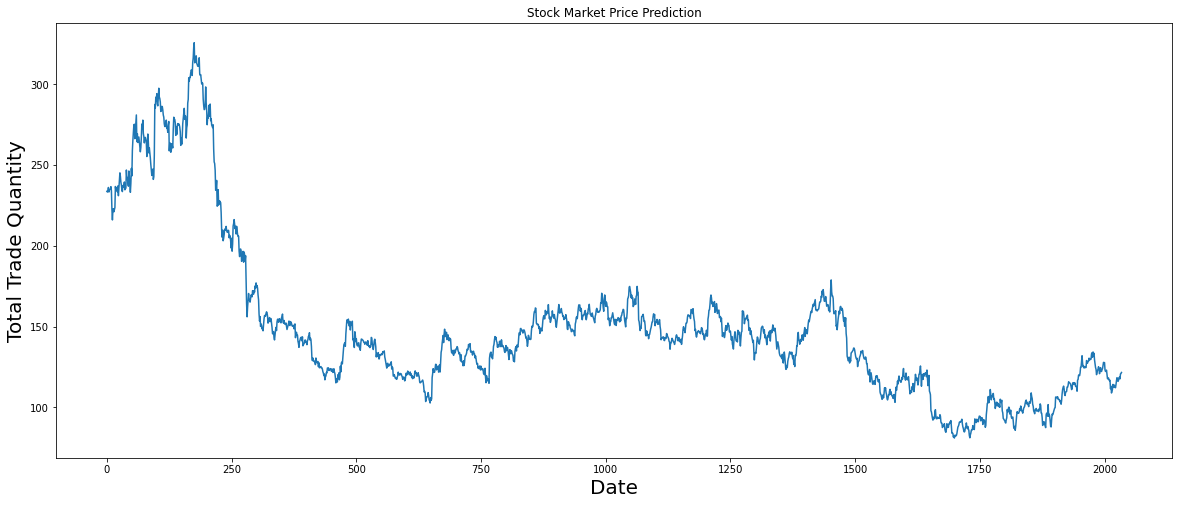

In [42]:
plt.figure(figsize=(20,8))
plt.title("Stock Market Price Prediction")
plt.plot(data_testing_complete['Close'])
plt.xlabel('Date', fontsize=20)
plt.ylabel('Total Trade Quantity', fontsize=20)
plt.show()

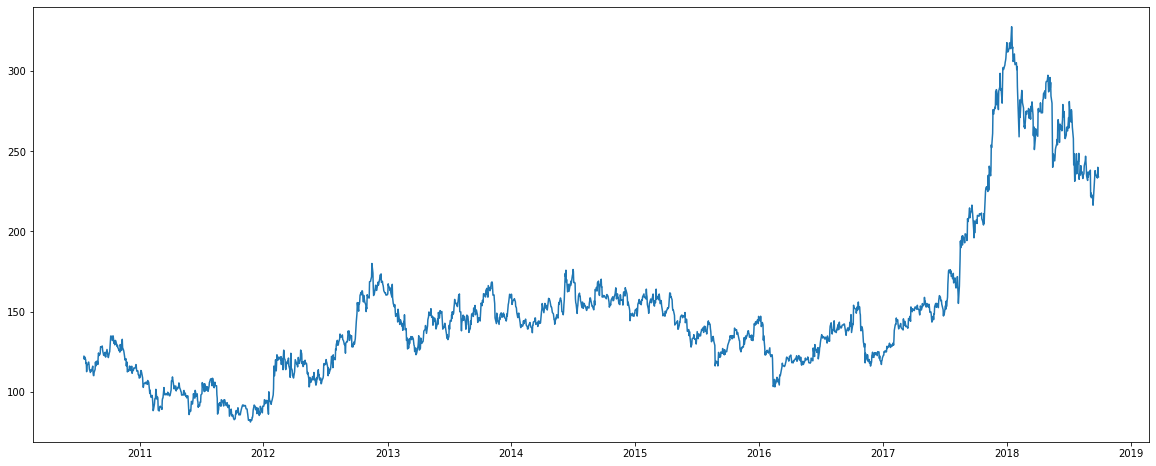

In [44]:
stock.index = stock['Date']
plt.figure(figsize=(20, 8))
plt.plot(stock["Open"], label='ClosePriceHist')

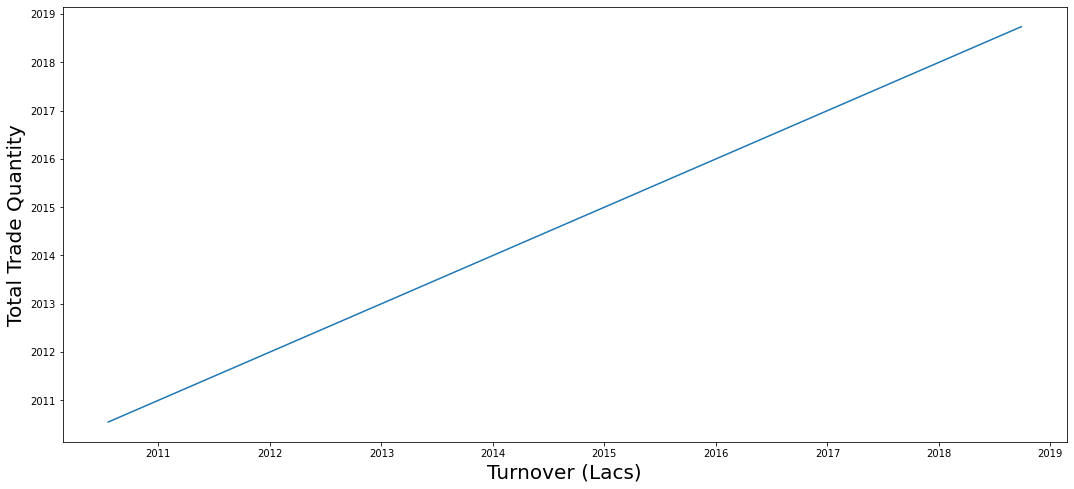

In [45]:
plt.figure(figsize=(18,8))
plt.plot(stock['Date'])
plt.xlabel('Turnover (Lacs)', fontsize=20)
plt.ylabel('Total Trade Quantity', fontsize=20)
plt.show()

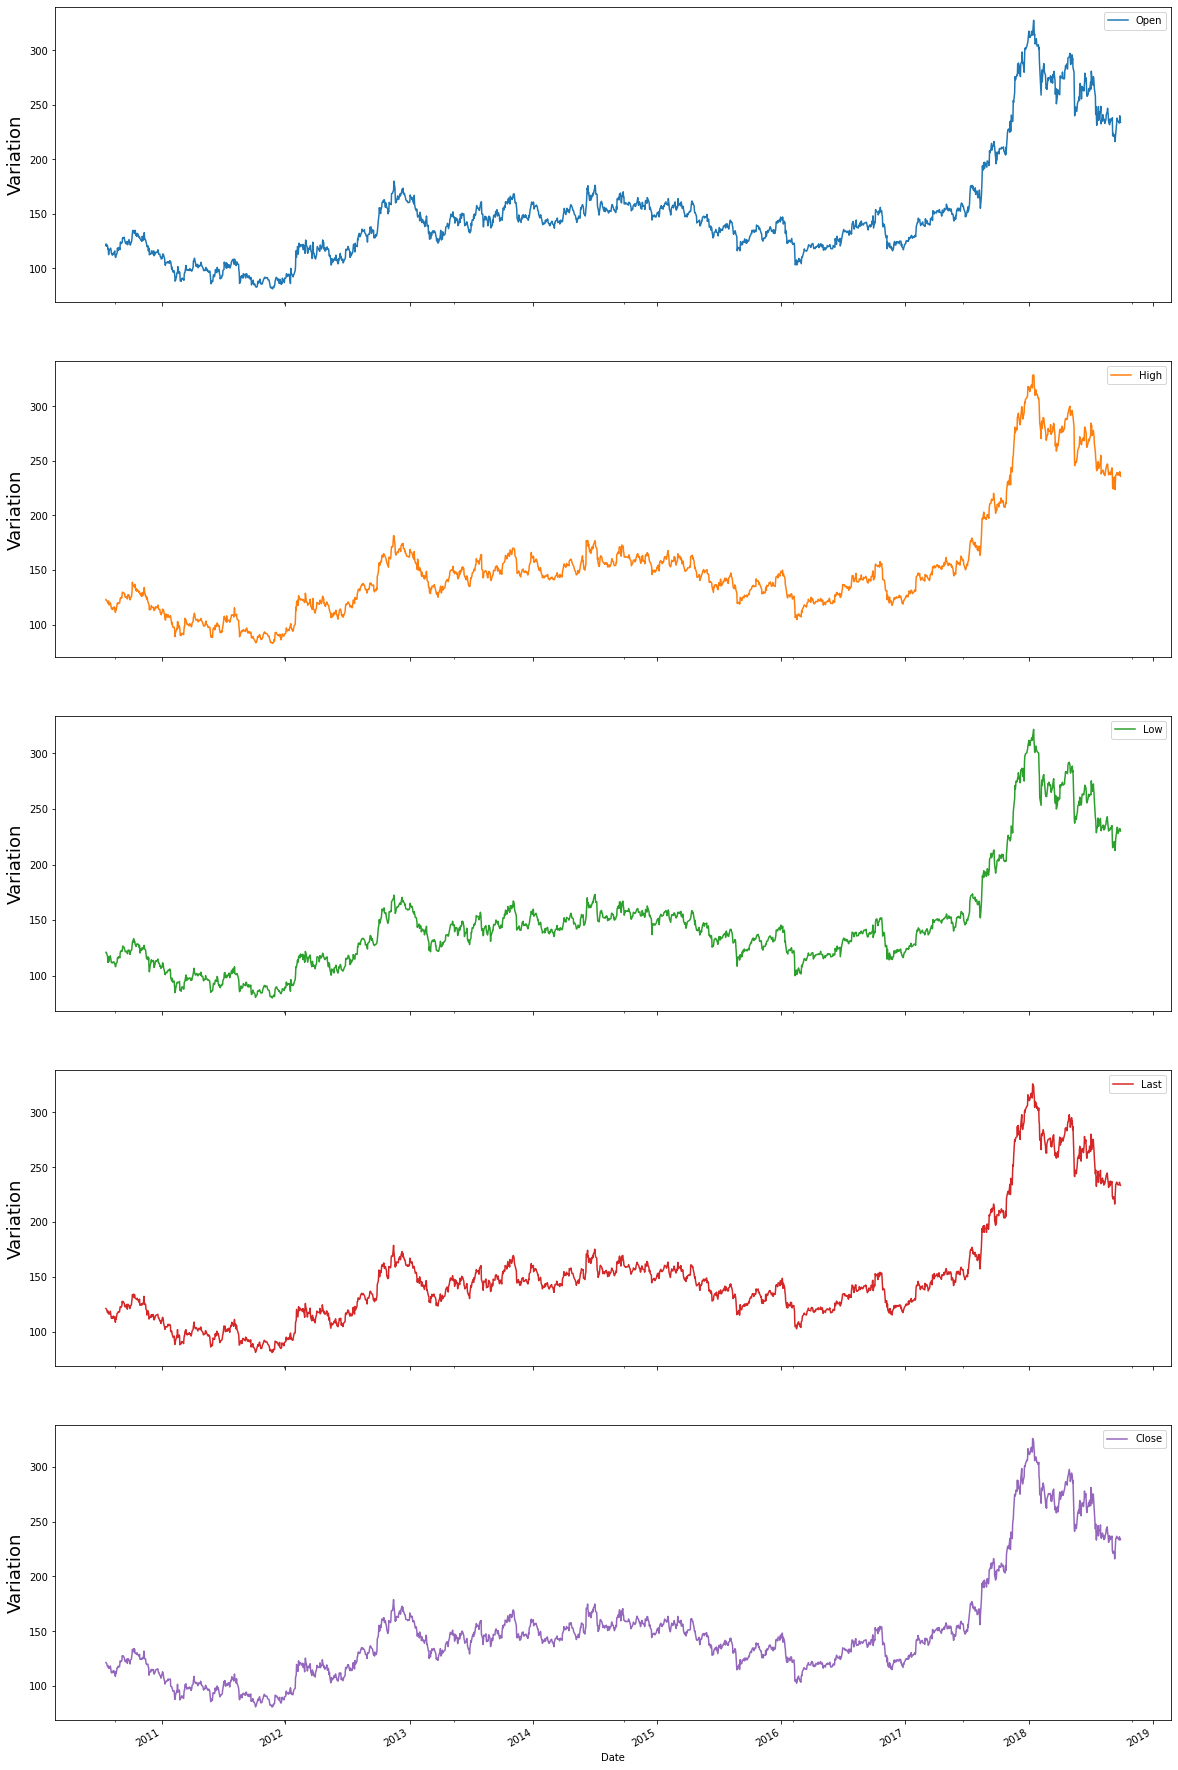

In [47]:
cols_plot = ['Open','High','Low','Last','Close']
axes = stock[cols_plot].plot(alpha = 1, figsize=(20, 35), subplots = True)
for i in axes:
    i.set_ylabel('Variation',fontsize=18)

**Conclusion** : Thus Long Short-Term Memory (LSTM) algorithm is used to forecast the current market trends and predict the stock prices accurately.